In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
!pip install missingno
import missingno as ms
df = pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

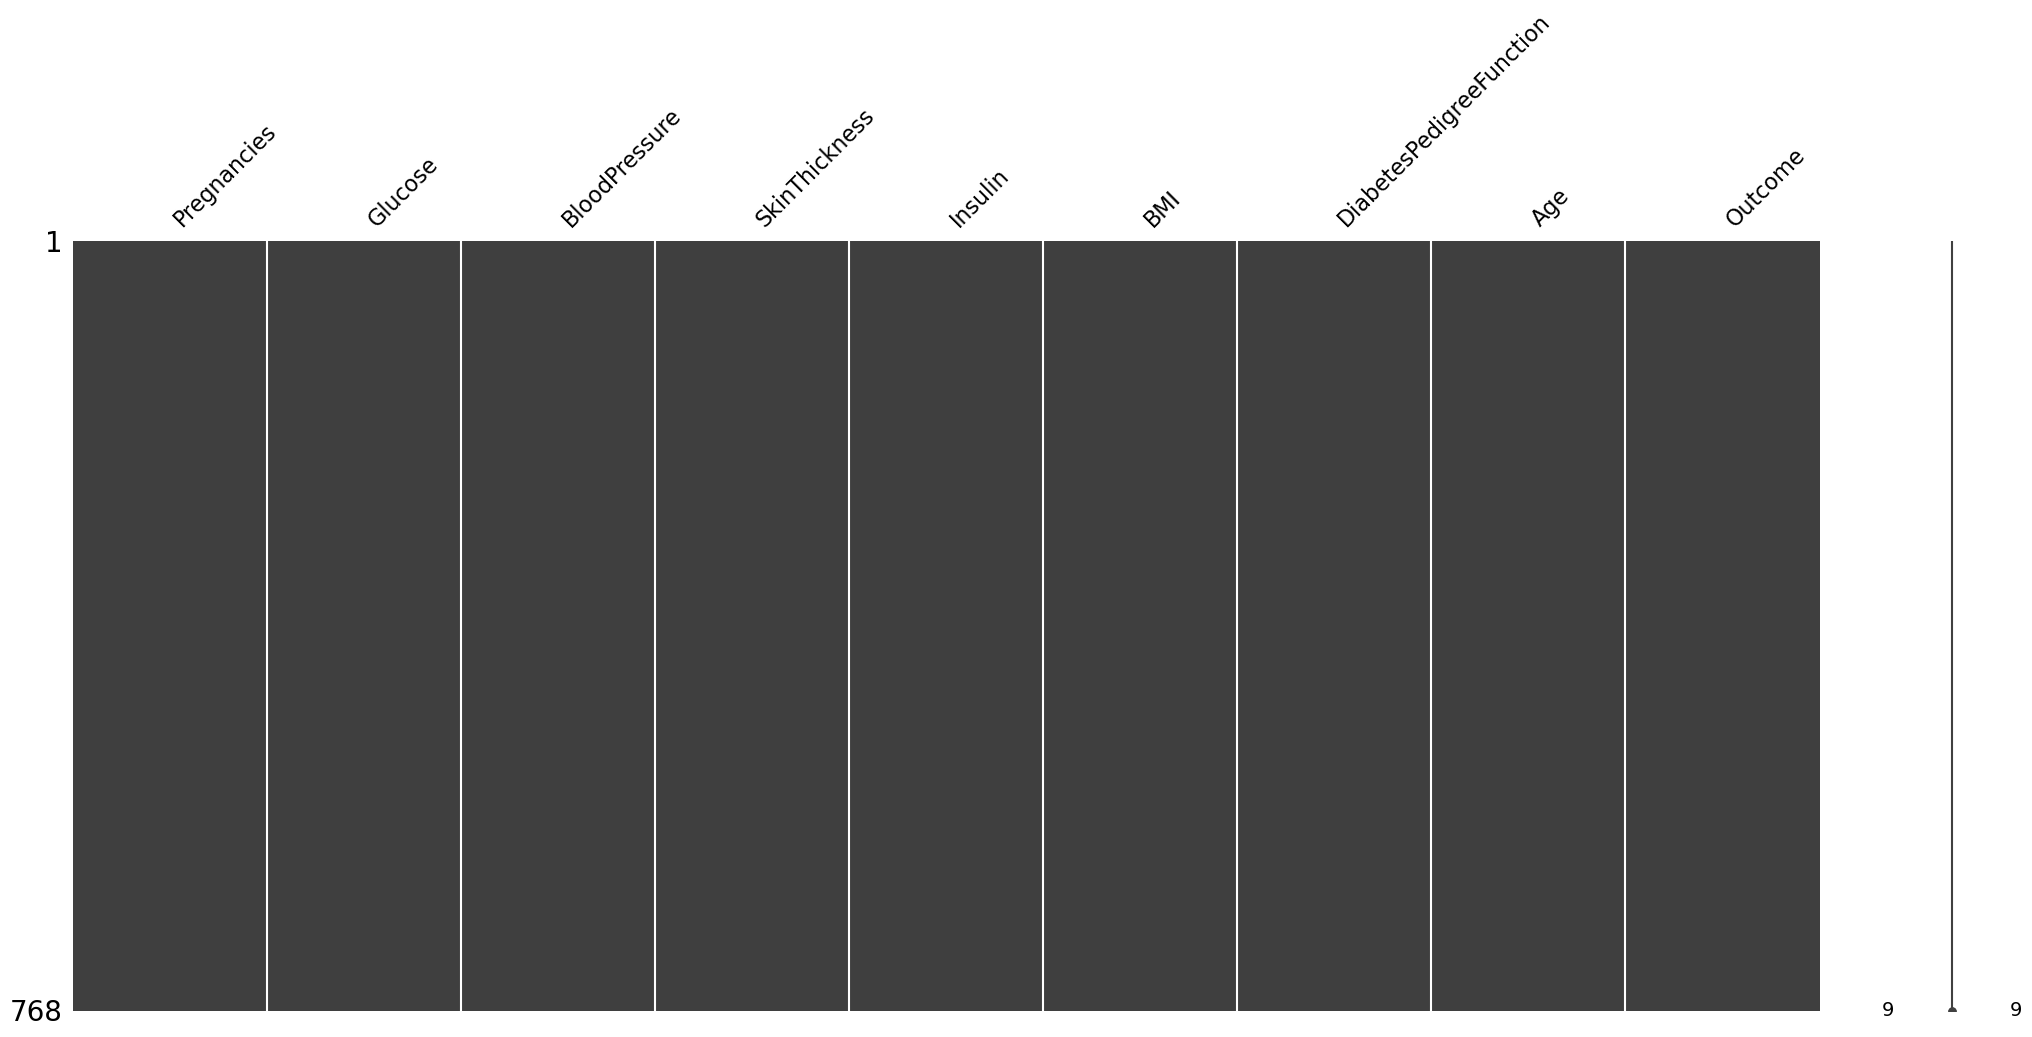

In [10]:
ms.matrix(df)

<AxesSubplot:>

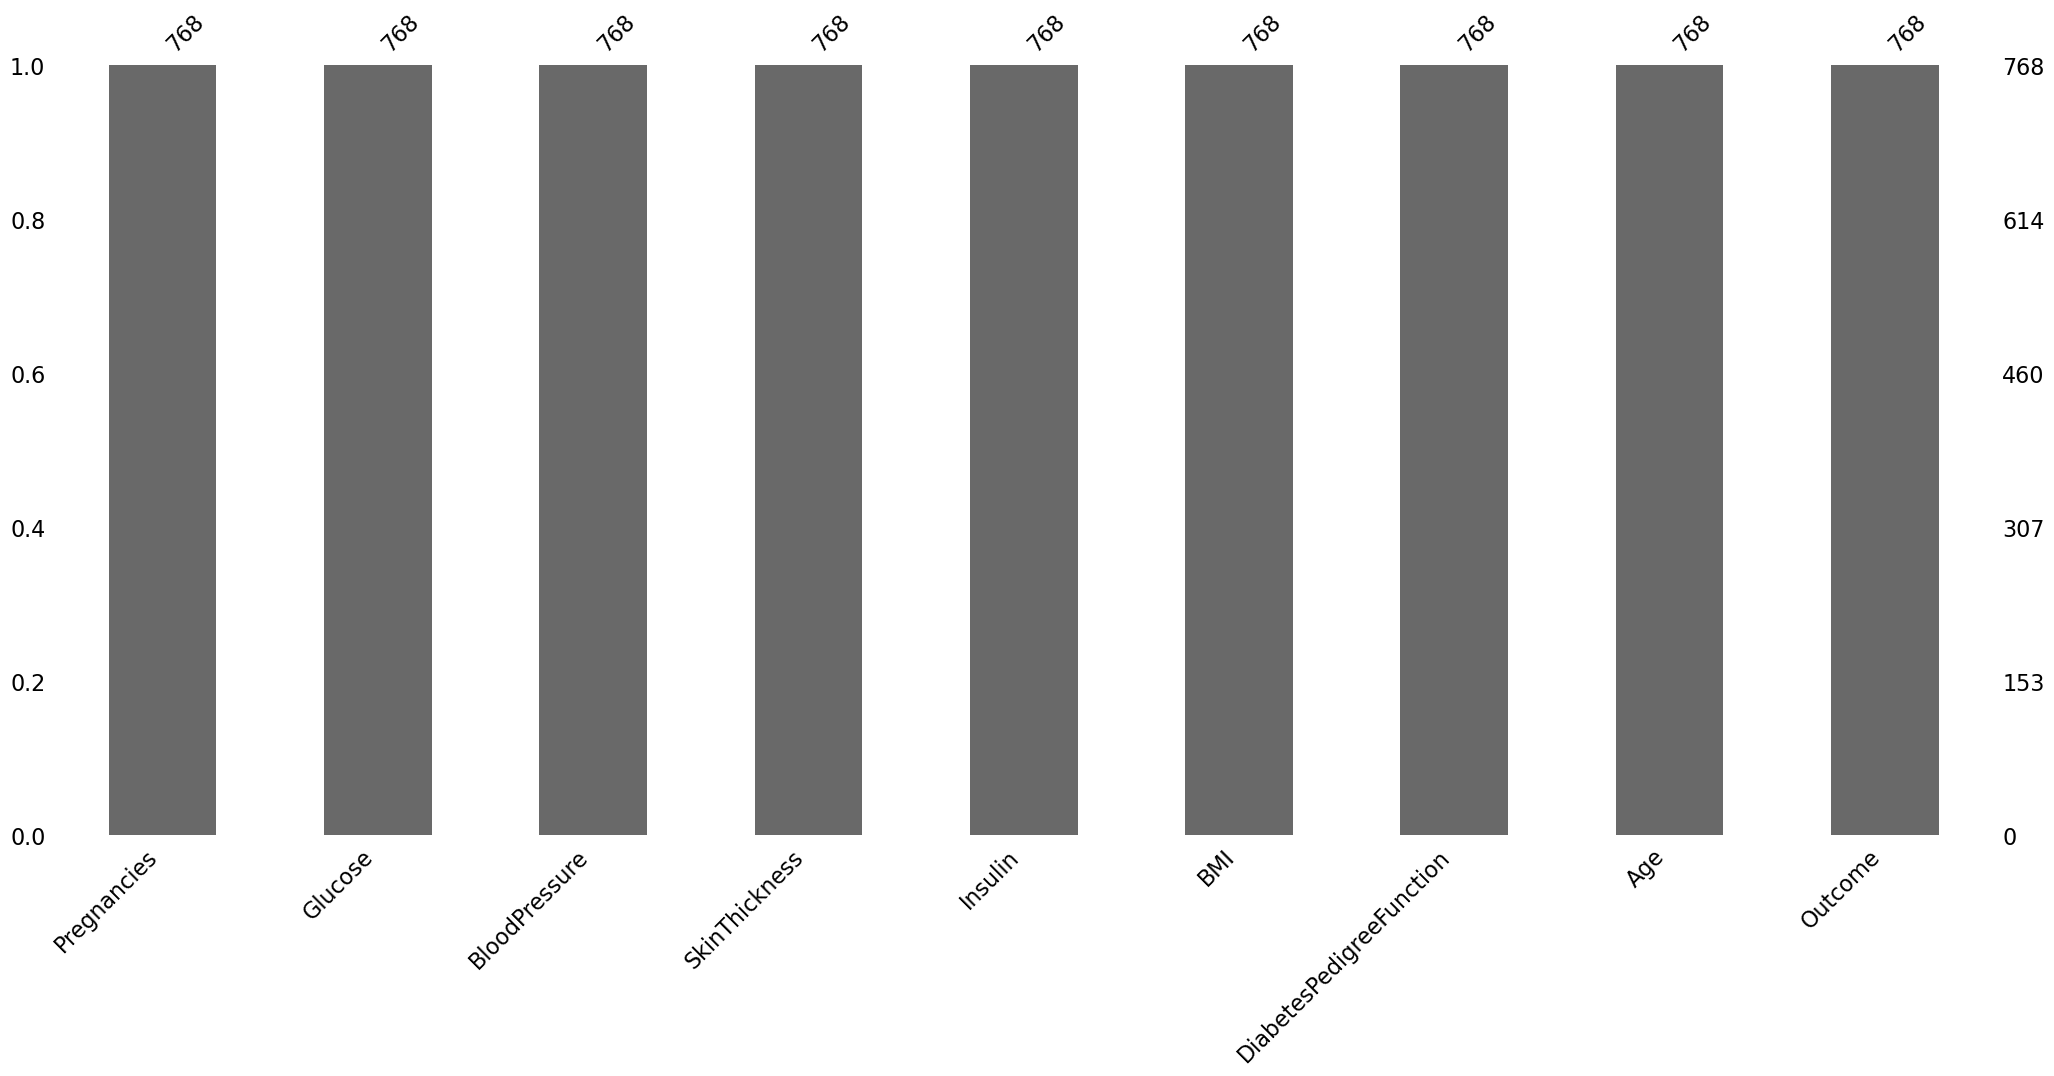

In [12]:
ms.bar(df)

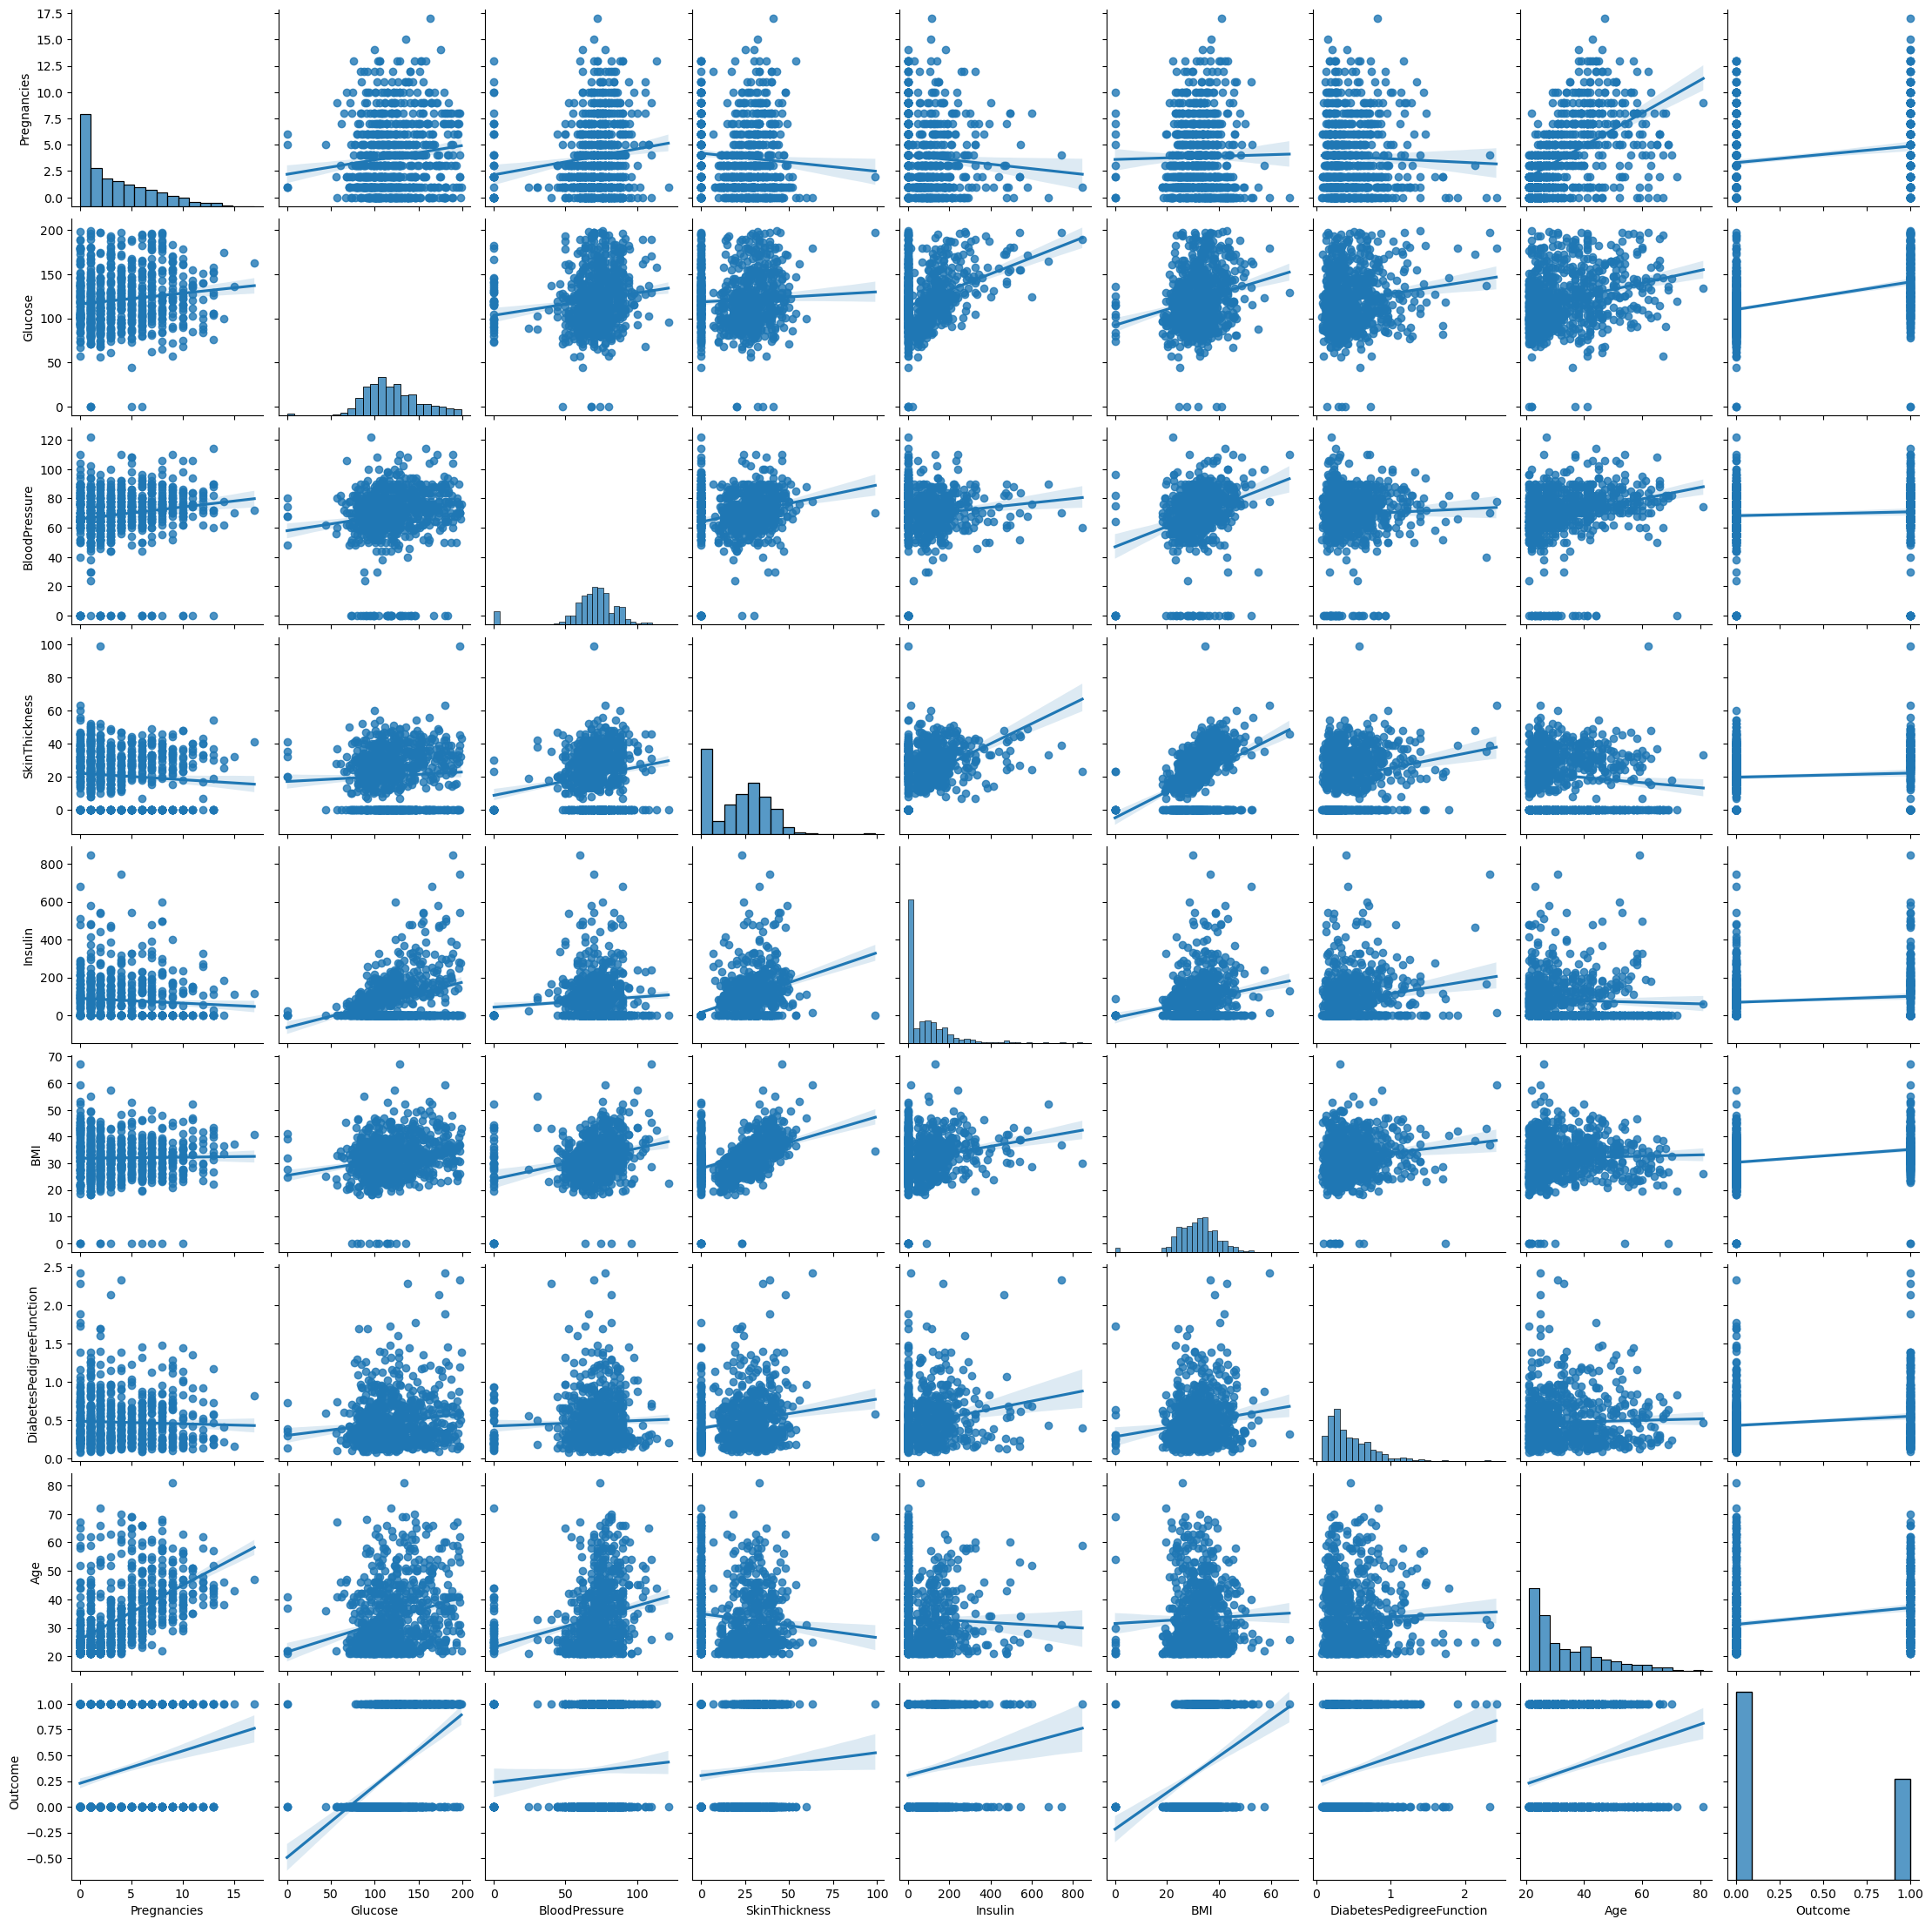

In [13]:
sb.pairplot(df,kind="reg")

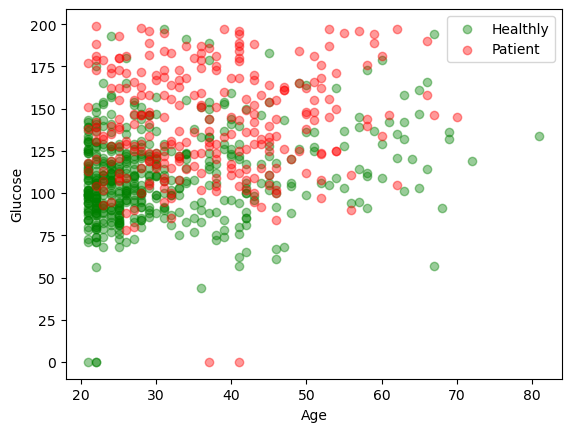

In [15]:
healthly_patient = df[df.Outcome == 0]
diabetes_patient = df[df.Outcome == 1]

plt.scatter(healthly_patient.Age,healthly_patient.Glucose,color="green",label="Healthly",alpha=0.4)
plt.scatter(diabetes_patient.Age,diabetes_patient.Glucose,color="red",label="Patient",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [5]:
y = df.Outcome.values
X_ = df.drop(["Outcome"],axis=1)
x = (X_- np.min(X_)/np.max(X_)-np.min(X_))
print("Before: {0} \n After: {1}".format(x,X_))

NameError: name 'df' is not defined

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
preditcion = knn.predict(x_test)
knn.score(x_test,y_test)

C:\Users\Sena Bayaz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sena Bayaz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

0.7662337662337663

In [56]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print("{0} {1}".format(sayac,knn_yeni.score(x_test,y_test)*100))
    sayac += 1

1 79.22077922077922
2 74.02597402597402
3 77.92207792207793
4 74.02597402597402
5 72.72727272727273
6 75.32467532467533
7 74.02597402597402
8 76.62337662337663
9 76.62337662337663
10 76.62337662337663


C:\Users\Sena Bayaz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sena Bayaz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
sc = MinMaxScaler()
sc.fit_transform(X_)

NameError: name 'X_' is not defined

In [2]:
new_predict = knn.predict(sc.transform(np.array([[8,183,64,0,0,23.3,0.672,32]])))
new_predict[0]

NameError: name 'knn' is not defined